### Importing the Libraries

In [1]:
import os 
import warnings
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, 
                             recall_score, roc_auc_score, plot_confusion_matrix,
                             precision_recall_curve, roc_curve)

In [3]:
!pip install imblearn

In [4]:
from imblearn.ensemble import BalancedBaggingClassifier

In [5]:
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv('new_physics_signal.csv')

In [7]:
data.head()

,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14,Class
0,78.482022,52.871985,-64.917465,-78.448475,-57.987246,-92.520585,27.806597,46.774201,-57.512910,22.899098,-38.790567,-83.959697,11.666977,846.710033,0
1,78.379086,55.058180,-68.153619,-82.693368,-59.561586,-93.335494,19.354007,47.128549,-60.470478,23.100267,-36.209469,-84.888323,11.836796,25.025335,0
2,79.609922,55.395154,-61.506139,-99.031856,-56.643424,-91.474574,32.361097,48.480810,-63.011139,20.523559,-38.380731,-85.190411,11.483291,2127.582986,0
3,80.592326,55.085738,-73.077999,-91.084996,-60.244160,-92.874068,25.292852,46.640591,-66.546879,25.600912,-39.059436,-84.421174,12.058619,700.637724,0
4,75.686606,56.323331,-69.943208,-75.363929,-57.215389,-92.485721,32.606410,46.729047,-56.972408,21.156952,-33.125372,-83.400313,12.788145,401.390816,0


### Simple preprocessing the Dataset

In [8]:
data.isnull().sum()

p1       5
p2       5
p3       5
p4       5
p5       5
p6       5
p7       5
p8       5
p9       5
p10      5
p11      5
p12      5
p13      5
p14      5
Class    0
dtype: int64

In [9]:
"""
removing the values containing null, we can not replace as replacing would alter the event
"""

data = data.dropna()
data.isnull().sum()

p1       0
p2       0
p3       0
p4       0
p5       0
p6       0
p7       0
p8       0
p9       0
p10      0
p11      0
p12      0
p13      0
p14      0
Class    0
dtype: int64

In [10]:
data['Class'].value_counts()

0    284245
1       492
Name: Class, dtype: int64

In [11]:
data_x = data.iloc[:, :-1]
data_y = data.iloc[:, -1:]

### Scaling and splitting

In [12]:
scaler = StandardScaler()

In [13]:
data_x_scaled = scaler.fit_transform(data_x)

In [14]:
X = np.array(data_x_scaled)
y = np.array(data_y)

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=1234)

In [16]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.1)

In [17]:
print(f"X_train : {X_train.shape}, X_valid : {X_valid.shape}, X_test : {X_test.shape}")
print(f"X_train : {y_train.shape}, y_valid : {y_valid.shape}, y_test : {y_test.shape}")

X_train : (199315, 14), X_valid : (76879, 14), X_test : (8543, 14)
X_train : (199315, 1), y_valid : (76879, 1), y_test : (8543, 1)


### Running model experiments

In [18]:
def run_model(model):
    model.fit(X_train, y_train)
    y_valid_predicted = model.predict(X_valid)
    y_test_predicted = model.predict(X_test)
    
    valid_acc = accuracy_score(y_valid, y_valid_predicted)
    valid_precision = precision_score(y_valid, y_valid_predicted)
    valid_recall = recall_score(y_valid, y_valid_predicted)
    
    test_acc = accuracy_score(y_test, y_test_predicted)
    test_precision = precision_score(y_test, y_test_predicted)
    test_recall = recall_score(y_test, y_test_predicted)
    
    print(f"Validation ACC: {valid_acc:.3f}, Precision: {valid_precision:.3f}, Recall: {valid_recall:.3f}")
    print(f"Testing ACC: {test_acc:.3f}, Precision: {test_precision:.3f}, Recall: {test_recall:.3f}")
    
    plot_confusion_matrix(model, X_valid, y_valid, cmap="GnBu")
    plt.title('Validation Confusion matrix plot')
    plt.show()
    
    plot_confusion_matrix(model, X_test, y_test, cmap="GnBu")
    plt.title('Testing Confusion matrix plot')
    plt.show()
    
    return (valid_acc, valid_precision, valid_recall), (test_acc, test_precision, test_recall)

In [19]:
def run_all_models(models, model_names):
    all_valid_acc = {}
    all_valid_precision = {}
    all_valid_recall = {}
    
    all_test_acc = {}
    all_test_precision = {}
    all_test_recall = {}
    
    for model, model_name in tqdm(zip(models, model_names), total=len(models)):
        print(f"\nUSING {model_name}")
        (valid_acc, valid_precision, valid_recall), (test_acc, test_precision, test_recall) = run_model(model)
        
        all_valid_acc[model_name] = valid_acc
        all_valid_recall[model_name] = valid_recall
        all_valid_precision[model_name] = valid_precision
        
        all_test_acc[model_name] = test_acc
        all_test_recall[model_name] = test_recall
        all_test_precision[model_name] = test_precision
    
    return {
        'all_valid_acc' : all_valid_acc,
        'all_valid_recall' : all_valid_recall,
        'all_valid_precision' : all_valid_precision,
        
        'all_test_acc' : all_test_acc,
        'all_test_recall' : all_test_recall,
        'all_test_precision' : all_test_precision
    }

### Running all the model

  0%|          | 0/7 [00:00<?, ?it/s]


USING RANDOM FOREST CLASSIFIER
Validation ACC: 0.999, Precision: 0.976, Recall: 0.297
Testing ACC: 1.000, Precision: 1.000, Recall: 0.556


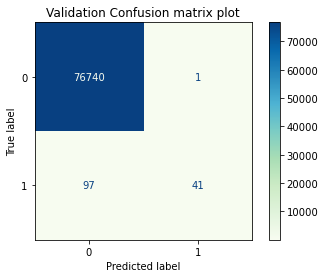

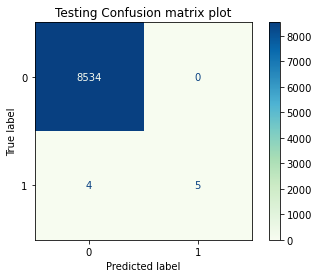


USING DECISION TREE CLASSIFIER
Validation ACC: 0.998, Precision: 0.446, Recall: 0.536
Testing ACC: 0.998, Precision: 0.308, Recall: 0.444


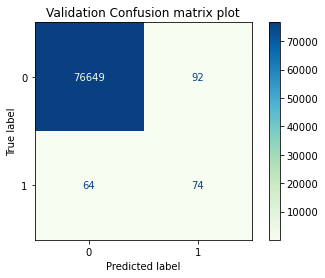

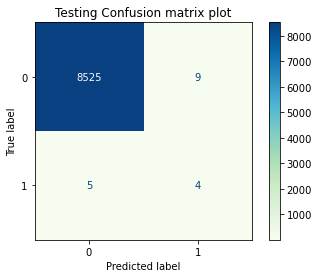


USING KNN
Validation ACC: 0.999, Precision: 0.965, Recall: 0.399
Testing ACC: 0.999, Precision: 1.000, Recall: 0.444


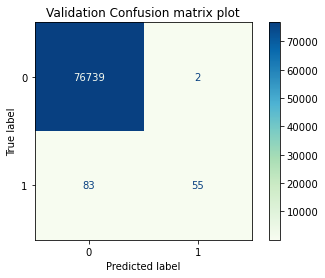

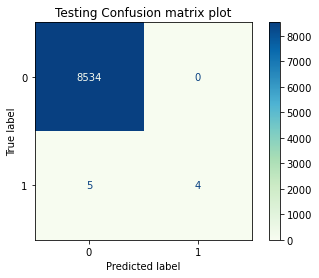


USING LOGISTIC REGRESSION
Validation ACC: 0.998, Precision: 0.571, Recall: 0.029
Testing ACC: 0.999, Precision: 0.000, Recall: 0.000


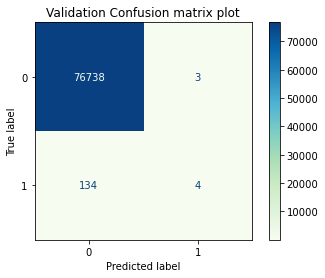

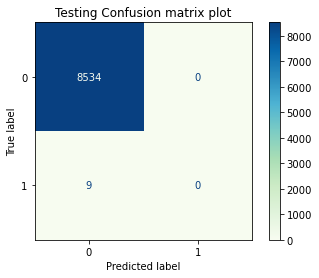


USING SVM
Validation ACC: 0.999, Precision: 0.977, Recall: 0.312
Testing ACC: 0.999, Precision: 1.000, Recall: 0.444


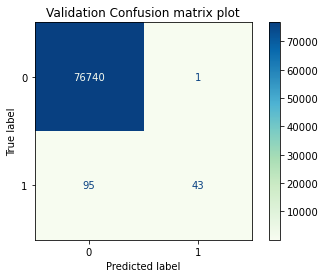

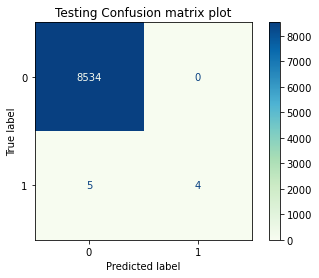


USING BALANCED BAGGIN CLASSIFIER (DECISION TREE as BASE)
Validation ACC: 0.929, Precision: 0.021, Recall: 0.833
Testing ACC: 0.934, Precision: 0.012, Recall: 0.778


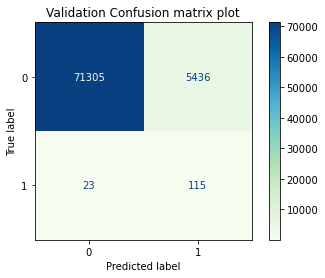

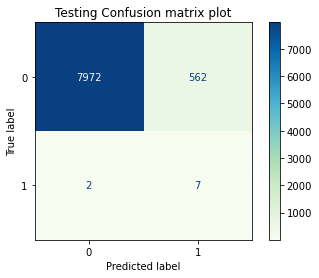


USING BALANCED BAGGIN CLASSIFIER (RANDOM FOREST as BASE)
Validation ACC: 0.917, Precision: 0.019, Recall: 0.870
Testing ACC: 0.919, Precision: 0.010, Recall: 0.778


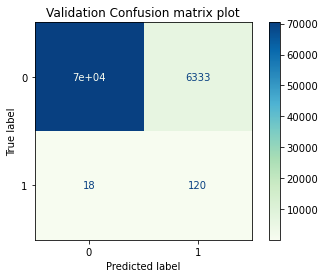

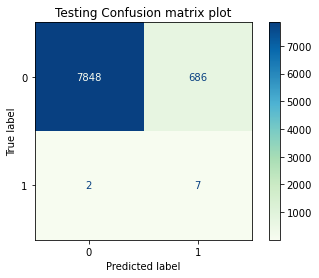

In [20]:
MODELS = [
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=3),
    LogisticRegression(random_state=0),
    svm.SVC(),
    BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                              sampling_strategy='auto',
                              replacement=False, 
                              random_state=0),
    
    BalancedBaggingClassifier(base_estimator=RandomForestClassifier(),
                             sampling_strategy='auto',
                             replacement=False, 
                             random_state=0)
]

MODEL_NAMES = [
    'RANDOM FOREST CLASSIFIER',
    'DECISION TREE CLASSIFIER',
    'KNN',
    'LOGISTIC REGRESSION',
    'SVM',
    'BALANCED BAGGIN CLASSIFIER (DECISION TREE as BASE)',
    'BALANCED BAGGIN CLASSIFIER (RANDOM FOREST as BASE)'
    
]

MODEL_LOGS = run_all_models(MODELS, MODEL_NAMES)

In [21]:
MODEL_LOGS

{'all_valid_acc': {'RANDOM FOREST CLASSIFIER': 0.998725269579469,
  'DECISION TREE CLASSIFIER': 0.997970837289767,
  'KNN': 0.9988943664719885,
  'LOGISTIC REGRESSION': 0.9982179789019108,
  'SVM': 0.9987512844860105,
  'BALANCED BAGGIN CLASSIFIER (DECISION TREE as BASE)': 0.928992312595117,
  'BALANCED BAGGIN CLASSIFIER (RANDOM FOREST as BASE)': 0.9173896642776311},
 'all_valid_recall': {'RANDOM FOREST CLASSIFIER': 0.2971014492753623,
  'DECISION TREE CLASSIFIER': 0.5362318840579711,
  'KNN': 0.39855072463768115,
  'LOGISTIC REGRESSION': 0.028985507246376812,
  'SVM': 0.3115942028985507,
  'BALANCED BAGGIN CLASSIFIER (DECISION TREE as BASE)': 0.8333333333333334,
  'BALANCED BAGGIN CLASSIFIER (RANDOM FOREST as BASE)': 0.8695652173913043},
 'all_valid_precision': {'RANDOM FOREST CLASSIFIER': 0.9761904761904762,
  'DECISION TREE CLASSIFIER': 0.4457831325301205,
  'KNN': 0.9649122807017544,
  'LOGISTIC REGRESSION': 0.5714285714285714,
  'SVM': 0.9772727272727273,
  'BALANCED BAGGIN CLASSI